In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)

In [3]:
faces.data.shape

(1560, 2914)

In [4]:
faces.images[0].shape

(62, 47)

In [5]:
faces.target_names


array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
       'Serena Williams', 'Tony Blair'], dtype='<U17')

In [6]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

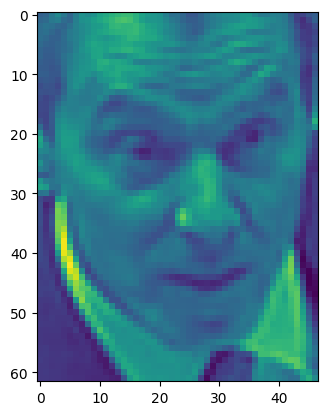

In [7]:
plt.imshow(faces.images[0])

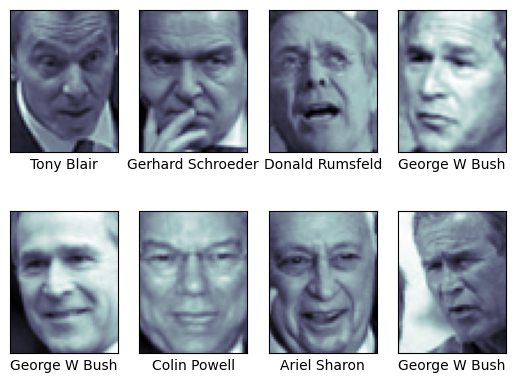

In [11]:
fig ,ax = plt.subplots(2,4)
for idx ,axidx in enumerate(ax.flat):
  axidx.imshow(faces.images[idx],cmap ='bone')
  axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])

In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [16]:
pcaModel = PCA(n_components=150,whiten =True)
svmModel = SVC(kernel='rbf',class_weight='balanced')
mdl = make_pipeline(pcaModel,svmModel)

In [17]:
from sklearn.model_selection import train_test_split
Xtrain , Xtest ,ytrain ,ytest = train_test_split(faces.data,faces.target,test_size=0.2)

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1,5,15,30],'svc__gamma':[0.00001,0.00005,0.0001,0.005]}
grid = GridSearchCV(mdl,param_grid)

In [19]:
grid.fit(Xtrain,ytrain)

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 15, 30],
                         'svc__gamma': [1e-05, 5e-05, 0.0001, 0.005]})

In [22]:
print(grid.best_params_)

{'svc__C': 1, 'svc__gamma': 0.005}


In [23]:
mdl = grid.best_estimator_

In [24]:
y_pred = mdl.predict(Xtest)

In [25]:
ytest

array([ 3,  9,  3,  3, 11,  1,  4,  3,  7,  4,  1, 11,  1,  6,  4,  1,  3,
        3,  1,  0,  1,  1, 11,  3,  8,  7, 10,  4,  2,  5,  4,  3,  3, 10,
        1,  3, 11,  4, 11,  3,  3,  3,  2,  1,  3,  3,  3,  1,  3,  8,  6,
       10,  6,  6,  4, 10,  9,  7, 11,  2,  3,  3,  1,  7,  8, 11,  4,  3,
       11,  3,  1,  3,  3,  0, 11,  0,  3,  4,  3, 11,  8,  4,  3, 11,  3,
        0,  8, 10,  3,  1,  8,  1,  3,  3,  1,  7,  0,  4, 10,  3,  3,  3,
        1,  0,  4, 11,  2,  3,  3,  7,  1,  3,  9,  8,  0,  8,  3,  3,  3,
        6,  5,  2,  5,  3, 11,  3, 11,  3,  3,  3,  9,  5,  1,  4,  3,  3,
        7,  4,  5,  3,  3,  0,  5,  5,  3, 10,  3,  2,  3,  3,  2, 11,  3,
       11,  1,  3,  3,  1,  4,  3,  3,  3, 10,  2, 11, 11,  3,  4,  5,  3,
        3,  3,  3,  3,  3,  3,  3,  1,  3,  3,  6,  8,  3,  3,  5,  3,  3,
        8,  1,  7,  0, 10,  1, 10,  3,  5,  4,  3, 11,  3,  8, 10,  4,  0,
        3, 11,  7,  4, 11,  2,  2,  2,  0,  5,  3,  1,  5,  4,  1, 11,  2,
        3,  3,  3,  1,  7

In [26]:
y_pred

array([ 3,  1,  3,  3,  1,  1,  3,  3,  7,  4,  1, 11,  1,  4,  4,  1,  3,
        3,  3,  0,  1,  1, 11,  3,  8,  3,  1, 11,  2,  3,  4,  3,  3,  1,
        1,  3, 11,  4, 11,  3,  3,  3,  2,  5,  1,  3,  3,  1,  3,  1, 11,
       10,  2,  6,  4, 10,  1,  7, 11,  2,  3,  3,  1,  7,  1, 11,  4,  3,
       11,  1,  1,  3,  3,  1, 11,  2,  3,  2,  3,  3,  8,  4,  3, 11,  3,
        0,  8,  2,  3,  1,  4,  1,  3,  3,  1,  2,  0,  2,  1,  0,  3,  3,
        1,  1,  4,  3,  1,  3,  3,  7,  1,  3,  9,  8,  0,  8,  3,  3,  3,
        6,  5,  2,  5,  3, 11,  3,  8,  3,  3,  3,  9,  5,  1,  4,  3,  3,
        7,  1,  5,  3,  3,  2,  5, 11,  3, 10,  3,  2,  3,  3,  2,  3,  3,
       11,  1,  3,  1,  1,  4,  3,  3,  3,  3,  2,  1, 11,  3,  4,  5,  3,
        3,  3,  1,  3,  3,  3,  3,  1,  3,  1,  6,  8,  3,  3,  5,  3,  3,
        8,  1,  1,  0,  1,  1, 10,  3,  9,  4,  3,  3,  3,  8, 10,  4,  0,
        3, 11,  7,  3, 11,  3,  2,  2,  0,  5,  1,  1,  5,  4,  1, 11,  2,
        3,  3,  3,  9,  2

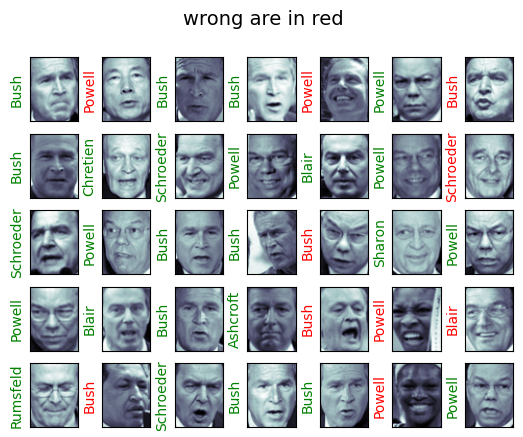

In [27]:
fig,ax = plt.subplots(5,7)
for idx ,axidx in enumerate(ax.flat):
  axidx.imshow(Xtest[idx].reshape(62,47),cmap='bone')
  axidx.set(xticks=[],yticks=[])
  axidx.set_ylabel(faces.target_names[y_pred[idx]].split()[-1],color='green' if y_pred[idx]==ytest[idx] else 'red')
  fig.suptitle('wrong are in red' ,size =14)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(ytest,y_pred,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.75      0.80        16
     Colin Powell       0.55      0.90      0.69        40
  Donald Rumsfeld       0.62      0.72      0.67        18
    George W Bush       0.89      0.89      0.89       113
Gerhard Schroeder       0.89      0.68      0.77        25
      Hugo Chavez       0.83      0.77      0.80        13
   Jacques Chirac       1.00      0.62      0.77         8
    Jean Chretien       0.91      0.67      0.77        15
    John Ashcroft       0.91      0.71      0.80        14
Junichiro Koizumi       0.60      0.60      0.60         5
  Serena Williams       1.00      0.50      0.67        14
       Tony Blair       0.82      0.74      0.78        31

         accuracy                           0.79       312
        macro avg       0.82      0.71      0.75       312
     weighted avg       0.82      0.79      0.79       312



Text(109.44999999999996, 0.5, 'predicted label')

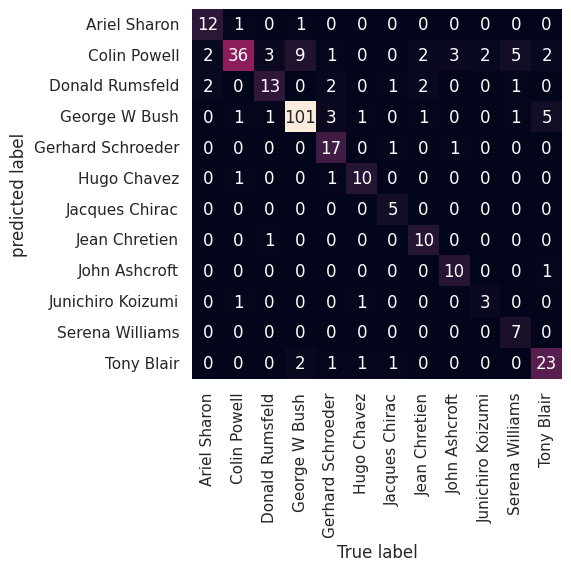

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel("True label")
plt.ylabel("predicted label")